# ( Ford Gobike Data Analysis )
## by (Omar Reda Hosseny)

## Investigation Overview

> In this presentation, I wanted to look at the characteristics of trips that could be affect trips numbers and duration    
The main focus was on start hour,start day of week , member age ,user type and member gender 

## Dataset Overview

 > the dataset contains 183412 trip with features vary from trip information such as trip duration and start time      
and member information such as birth year, gender,usertype    


In [1]:
# import all packages and set plots to be embedded inline
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io
import requests

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe and print statistics
#load in the dataset into a pandas dataframe and print statistics
url="https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#change start_time from object to datetime  
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
df['member_gender']=df['member_gender'].fillna(df['member_gender'].mode()[0])
df['member_birth_year']=df['member_birth_year'].fillna(df['member_birth_year'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

# Creating new columns for better analysis

In [5]:
#1-start_hour column
df['start_hour']=df['start_time'].dt.hour
#2-start_day column
df['start_day']=df['start_time'].dt.day_name()
#3-start_month column
df['start_month']=df['start_time'].dt.month
#4-calculating member age from birth year
df['member_age']=2019 - df['member_birth_year']

In [6]:
#convert start day into ordered categorical type
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_ordered=pd.api.types.CategoricalDtype(ordered = True,categories=days) 
df['start_day']=df['start_day'].astype(days_ordered) 

In [7]:
#keep only trips which less or equal one hour
df2=df[df['duration_sec']<=3600]
df2.shape

(181702, 20)

In [8]:
#keep only members with ages less than or equal 80 years
#because they represent a too small percentage of our population with 0.1%
df3=df2[df2["member_age"]<=80]
df3.shape

(181510, 20)

for better analysis I will divide ages into 3 categories   
***youth,adults and seniors***   
for better analysis I will divide day based on start hours into 4 categories   ***morning,afternoon,evening and night***


In [9]:
#Bin edges that will be used to cut our dataset into groups
bin_edges=[18,27,60,78]
# Labels for the three age buckets in our dataset
bin_names=['Youth','Adults','Seniors']
#create age bucketscolumn 
df3['age_buckets']= pd.cut(df3['member_age'], bin_edges, labels=bin_names)
#check for successful of creating age buckets column
df3.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,member_age,age_buckets
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2,45.0,Adults
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,23,Thursday,2,60.0,Adults
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,23,Thursday,2,36.0,Adults
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,23,Thursday,2,30.0,Adults
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,23,Thursday,2,31.0,Adults


In [10]:
#Bin edges that will be used to cut our dataset into groups
#value of (-1) to ensure including 0(12 am)hour included in the groups
bin_edges=[-1,5,12,18,23]
# Labels for the four day parts in our dataset
bin_names=['Night','Morning','Afternoon','Evening']
#create day parts column 
df3['day_parts']= pd.cut(df3['start_hour'], bin_edges, labels=bin_names)
#check for successful of creating day parts column
df3.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,member_age,age_buckets,day_parts
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,0,Friday,2,23.0,Youth,Night
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,0,Friday,2,35.0,Adults,Night
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,0,Friday,2,29.0,Adults,Night
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,0,Friday,2,31.0,Adults,Night
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,...,Subscriber,1989.0,Male,No,0,Friday,2,30.0,Adults,Night


In [11]:
#convert age_buckets and day_parts into ordered categorical types
var_dict = {'age_buckets': ['Youth','Adults','Seniors'],
            'day_parts': ['Morning', 'Afternoon', 'Evening', 'Night']}
                   

for col in var_dict:
    ordered_col = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[col])                              
    df3[col] = df3[col].astype(ordered_col)

## ( Distribution of Trip duration)

>duration of trip has a right skewed distribution so the duration of the trips is increased   
 most of trip duration is less than 1800 seconds (half an hour) with 96.3%   
 there are too few trips which durations are more than 3600 seconds(one hour) with 0.9%

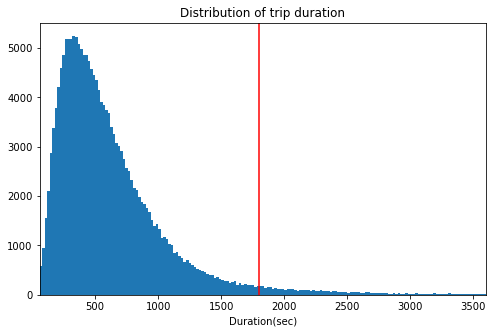

In [12]:
binsize = 20
bins = np.arange(0, df2['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'duration_sec', bins = bins)
plt.title('Distribution of trip duration')
plt.xlabel('Duration(sec)')
plt.xlim(60, 3600)
plt.axvline(x=1800, color = "red")
plt.show()

## (Distribution of Member Age)

> the distribution of age is right skewed and most ages are 
between 20 and 45 years old   
the most of our population are not retired yet and they are in work or still study   


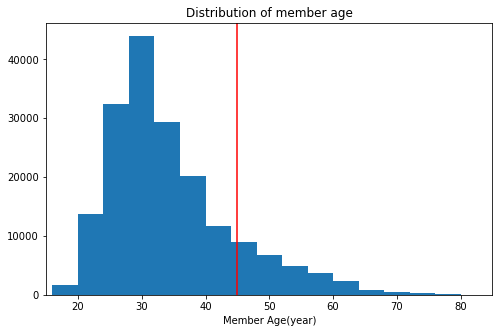

In [13]:
#replot the histogram after removing outliers
binsize =4
bins = np.arange(0, df3['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df3, x = 'member_age', bins = bins)
plt.title('Distribution of member age')
plt.xlabel('Member Age(year)')
plt.xlim(15,85)
plt.axvline(x=45, color = "red")
plt.show()

## (Percentage Of Each User Type)
>most of trips are made by  subscriber members with percentage of 89.6%   
while customers made only 10.4% of all trips  



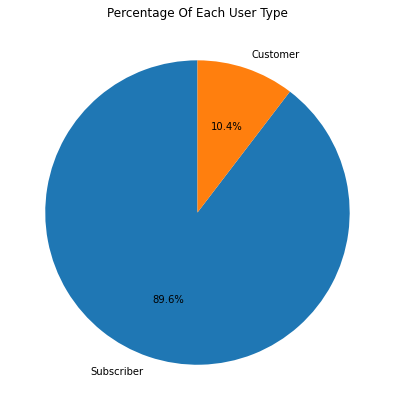

In [14]:
#plot pie chart for user type as it is a cateogrical variabt(round(user_counts/df3.shape[0],3)*100)
user_counts= df3['user_type'].value_counts()
labels ='Subscriber','Customer'
sizes=user_counts/df3.shape[0]
fig1,ax1 = plt.subplots(figsize = [7,7])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90) 
plt.title('Percentage Of Each User Type')
plt.show()

## (Percentage Of Each Gender In Our Data)
>most of trips are made by  males members with percentage of 75.76%      
while females made  22.27% of all trips and others made only 1.97% of all trips

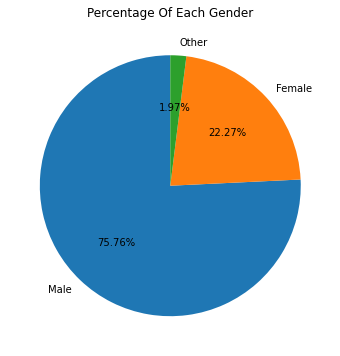

In [15]:
#plot pie chart for member gender as it is a cateogrical variable with only 3 values
gender_counts= df3['member_gender'].value_counts()
labels ='Male','Female','Other'
sizes=gender_counts/df3.shape[0]
fig1,ax1 = plt.subplots(figsize = [6,6])
ax1.pie(sizes,labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Percentage Of Each Gender')
plt.show()

## (Effect Of Day Parts Accorrding To User Type On The Trip Duration)
>we found that long trips occur in morning and afternoon part of the day    
and trip duration for customer are more than subscriber member for all parts of day

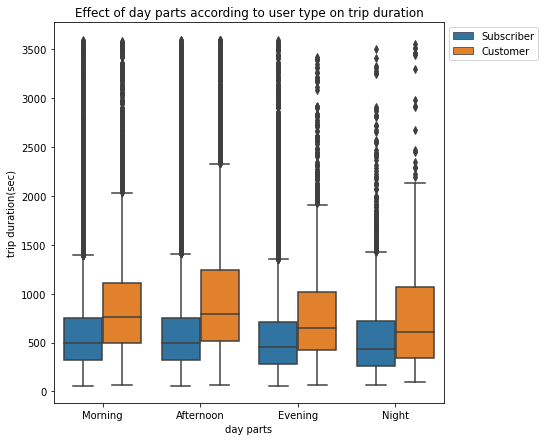

In [16]:
plt.figure(figsize = (7,7))
sb.boxplot(data = df3, x = "day_parts", y = "duration_sec", hue='user_type')
plt.xlabel('day parts');
plt.ylabel('trip duration(sec)')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title("Effect of day parts according to user type on trip duration")

plt.show()

## (Effect Of Age Buckets Accorrding To Gender On The Trip Duration)
>we found that for all age buckets males make the faster trips     
and other make the slowest trips    
except for youth females make the slowest trips

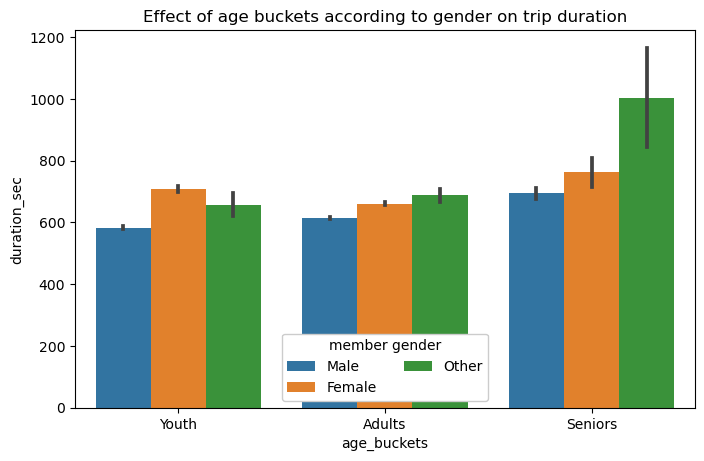

In [17]:
plt.figure(figsize = (8,5), dpi = 100)
ax = sb.barplot(data = df3, x = 'age_buckets', y = 'duration_sec', hue = 'member_gender')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'member gender')
plt.title("Effect of age buckets according to gender on trip duration");

## (Effect Of Day Of Week According To Age Buckets On The Trip Duration)
>we found that long trips occur at the weekend days such as saturday and sunday   
and for most days  youth trips are faster and adults make slower trips
while seniors make the slowest trips    
except monday and thursday trips duration of adults and youth are close to each other


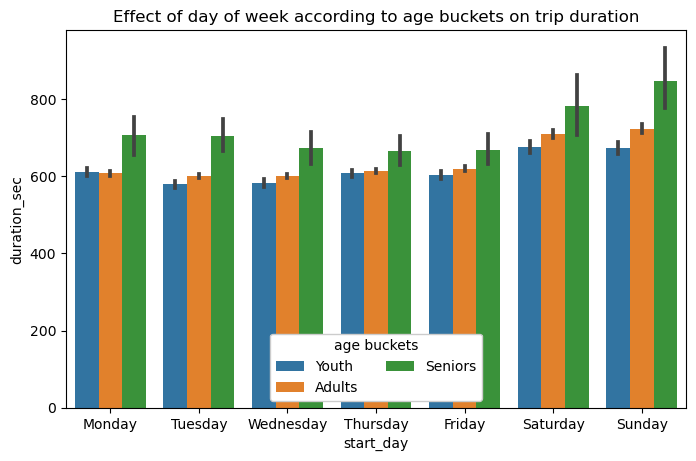

In [18]:
plt.figure(figsize = (8,5), dpi = 100)
ax = sb.barplot(data = df3, x = 'start_day', y = 'duration_sec', hue = 'age_buckets')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'age buckets')
plt.title("Effect of day of week according to age buckets on trip duration");